<!-- # <span style="color:#FFFFFF; font-size: 0%;">1 | Introduction</span>
<div style="border-radius: 0px; background-color: #112241; text-align:center;">
    <h4 style="color: white; padding: 1.5rem; font-size: 19px"><b>1 | INTRODUCTION</b></h4>
</div>
<!-- <br> -->

<div style="display: flex; flex-direction: row; align-items: center;">
    <div style="flex: 0; margin-top: 8px;">
        <img src="https://i.pinimg.com/474x/87/2f/38/872f388b608d7065788fc4ef3c8b83fb.jpg" alt="Image" style="max-width: 300px; max-height: 350px;" />
    </div>
    <div style="flex: 1; margin-left: 30px; margin-top: 6px">
        <p style="font-weight: bold; color: black; font-size: 17px">Introduction</p>
        <p>This notebook is created for New York Housing Market Data.
        </p>
        <p>This is a beginner-friendly notebook that attempts to perform Exploratory Data Analysis on the New York Housing Market Data and eventually train a <b>XGBoost</b> model on it and enhance the predictions by fine-tuning the model.
        </p>
        <p>Let's explore and then make results and discussion to gain deeper insights from our analysis. Let's explore and then make results and discussion to gain deeper insights from our analysis.</p>
        <blockquote>  If you find this notebook helpful please consider upvoting ❤️</blockquote>
    </div>
</div>


## Contents:
<hr>

1. [Data Exploration](#data)
2. [Exploritory Data Analysis](#eda)
3. [Modeling](#model)
4. [Predictions](#hyper)

### All the used libraries:

- Numpy
- Pandas
- Matplotlib
- Seaborn
- Folium
- Scikit-learn
- XGBoost
- warnings

### Models used to make predictions:

- XGBoost Classifier
- GridSearchCV for Hyperparameter tuning

Now, let's import the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import folium
import numpy as np
from IPython.display import Markdown
from sklearn.preprocessing import LabelEncoder

def bold(string):
    display(Markdown(string))

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4,
}

sns.set(rc=rc)
palette = ['#302c36', '#037d97', '#E4591E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

plt.style.use('seaborn-v0_8-pastel')

# 1. Data Exploration
This dataset contains prices of New York houses, providing valuable insights into the real estate market in the region. It includes information such as broker titles, house types, prices, number of bedrooms and bathrooms, property square footage, addresses, state, administrative and local areas, street names, and geographical coordinates.

## 1.1 Data Description

- **BROKERTITLE**: Title of the broker
- **TYPE**: Type of the house
- **PRICE**: Price of the house
- **BEDS**: Number of bedrooms
- **BATH**: Number of bathrooms
- **PROPERTYSQFT**: Square footage of the property
- **ADDRESS**: Full address of the house
- **STATE**: State of the house
- **MAIN_ADDRESS**: Main address information
- **ADMINISTRATIVE_AREA_LEVEL_2**: Administrative area level 2 information
- **LOCALITY**: Locality information
- **SUBLOCALITY**: Sublocality information
- **STREET_NAME**: Street name
- **LONG_NAME**: Long name
- **FORMATTED_ADDRESS**: Formatted address
- **LATITUDE**: Latitude coordinate of the house
- **LONGITUD**E: Longitude coordinate of the house

## 1.2 Data

In [3]:
df = pd.read_csv('/kaggle/input/new-york-housing-market/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

None

# 2. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected. EDA is an important first step in any data analysis.

## 2.1 Null Values:
Missing data/Null values is defined as the values or data that is not stored (or not present) for some variable/s in the given dataset.Here is a list of popular strategies to handle missing values in a dataset

- Deleting the Missing Values
- Imputing the Missing Values
- Imputing the Missing Values for Categorical Features
- Imputing the Missing Values using Sci-kit Learn Library
- Using “Missingness” as a Feature

Let's see if our data has any missing values or not.

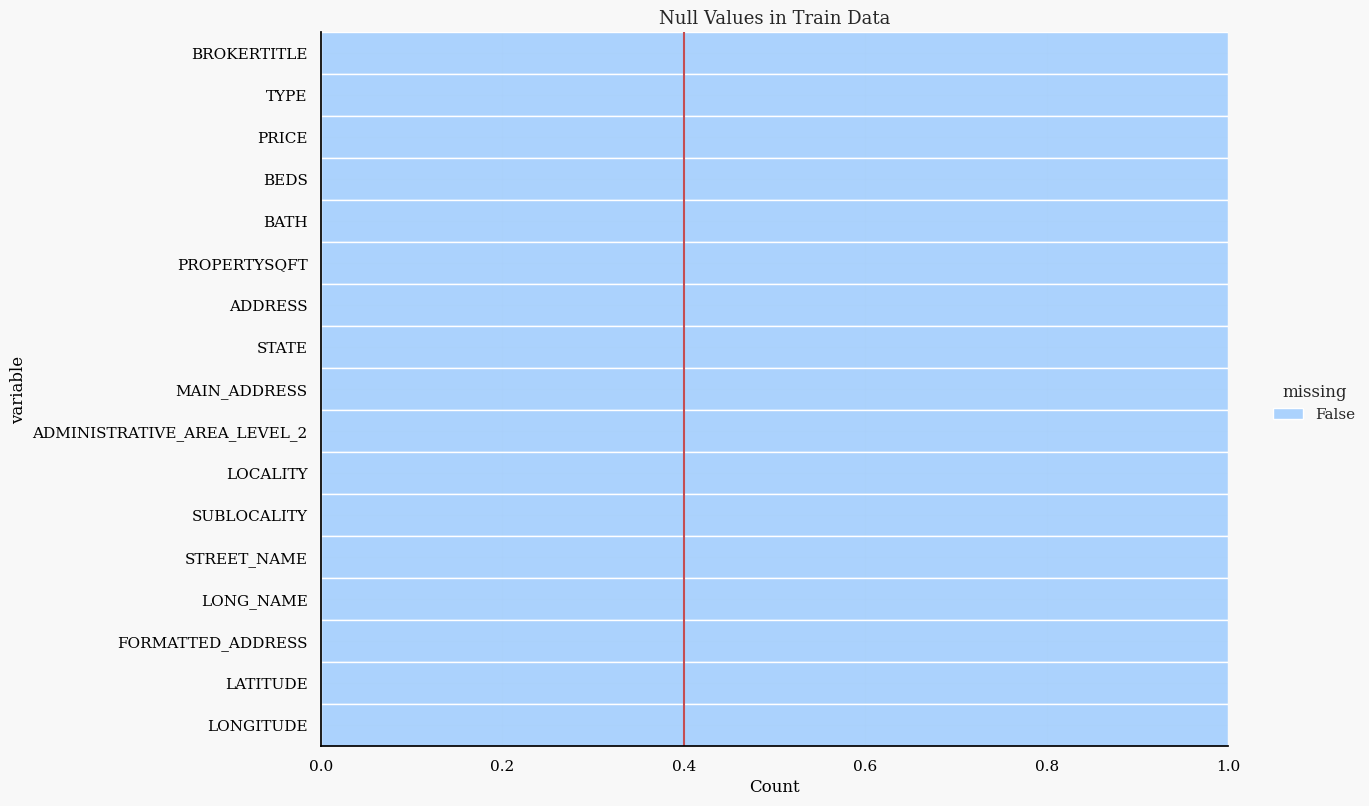

In [5]:
sns.displot(data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
#     width=10,
    aspect=1.6
)

# specifying a threshold value
plt.axvline(0.4, color='r')
plt.title('Null Values in Train Data', fontsize=13)
plt.show()

## 2.2 Top 500 Most and Least Costly Houses in New York

In [6]:
data = df[['LONGITUDE', 'LATITUDE', 'PRICE', 'STREET_NAME']].copy()
data = data.sort_values(by=['PRICE'], ascending=False)
data  = data.head(500)

data.rename(columns = {'LONGITUDE':'lon', 'LATITUDE':'lat', 
                              'PRICE':'value', 'STREET_NAME':'name'}, inplace = True) 

m = folium.Map(location=[48, -102], tiles="OpenStreetMap", zoom_start=3)

for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['value'],
   ).add_to(m)

map_title = "500 Most Costly Houses"
title_html = f'<h4 style="position:absolute;z-index:10000;left:40vw" ><b>{map_title}</b></h4>'
m.get_root().html.add_child(folium.Element(title_html))

sw = data[['lat', 'lon']].min().values.tolist()
ne = data[['lat', 'lon']].max().values.tolist()

m.fit_bounds([sw, ne])

m

In [7]:
data = df[['LONGITUDE', 'LATITUDE', 'PRICE', 'STREET_NAME']].copy()
data = data.sort_values(by=['PRICE'], ascending=True)
data  = data.head(500)

data.rename(columns = {'LONGITUDE':'lon', 'LATITUDE':'lat', 
                              'PRICE':'value', 'STREET_NAME':'name'}, inplace = True) 

m = folium.Map(location=[48, -102], tiles="OpenStreetMap", zoom_start=3)

for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
      popup=data.iloc[i]['value'],
   ).add_to(m)

map_title = "500 Least Costly Houses"
title_html = f'<h4 style="position:absolute;z-index:10000;left:40vw" ><b>{map_title}</b></h4>'
m.get_root().html.add_child(folium.Element(title_html))

sw = data[['lat', 'lon']].min().values.tolist()
ne = data[['lat', 'lon']].max().values.tolist()

m.fit_bounds([sw, ne])

m

## 2.3 Data Cleaning

### 1. Removing Unnecesory Columns

In [8]:
df = df.drop(['LONGITUDE', 'LATITUDE', 'FORMATTED_ADDRESS', 'LONG_NAME', 'STREET_NAME', 'ADMINISTRATIVE_AREA_LEVEL_2', 'MAIN_ADDRESS', 'STATE', 'ADDRESS', 'BROKERTITLE'], axis=1)
df.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,LOCALITY,SUBLOCALITY
0,Condo for sale,315000,2,2.000000,1400.0,New York,Manhattan
1,Condo for sale,195000000,7,10.000000,17545.0,New York,New York County
2,House for sale,260000,4,2.000000,2015.0,New York,Richmond County
3,Condo for sale,69000,3,1.000000,445.0,New York,New York County
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York,New York County


### 2. Renaming Columns

In [9]:
df.rename(columns = {'PRICE':'price', 'BEDS':'beds', 
                     'BATH':'bath', 'PROPERTYSQFT':'area', 'LOCALITY': 'place', 
                     'SUBLOCALITY':'sublocality', 'TYPE': "type"}, inplace = True) 

df.head()

,type,price,beds,bath,area,place,sublocality
0,Condo for sale,315000,2,2.000000,1400.0,New York,Manhattan
1,Condo for sale,195000000,7,10.000000,17545.0,New York,New York County
2,House for sale,260000,4,2.000000,2015.0,New York,Richmond County
3,Condo for sale,69000,3,1.000000,445.0,New York,New York County
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York,New York County


### 3. Removing some Outliers

In [10]:
df = df.drop(df[df['price'] == 2147483647].index)
df = df.drop(df[df['price'] == 195000000].index)

In [11]:
df.head()

,type,price,beds,bath,area,place,sublocality
0,Condo for sale,315000,2,2.000000,1400.0,New York,Manhattan
2,House for sale,260000,4,2.000000,2015.0,New York,Richmond County
3,Condo for sale,69000,3,1.000000,445.0,New York,New York County
4,Townhouse for sale,55000000,7,2.373861,14175.0,New York,New York County
5,House for sale,690000,5,2.000000,4004.0,New York,Kings County


## 2.3 Univariate Analysis

### 1. Property Type:

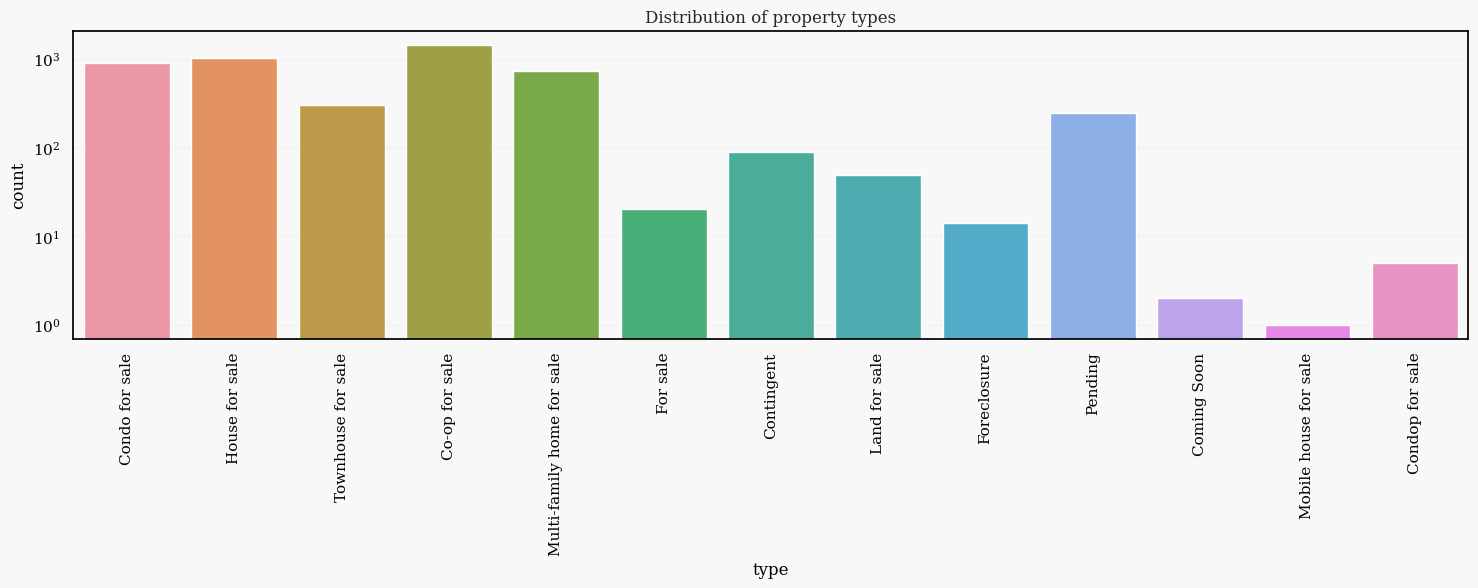

In [12]:
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.countplot(data=df, x='type', log=True)
plt.xticks(rotation=90)
plt.title('Distribution of property types')
plt.show()

### 2. Number of Beds:

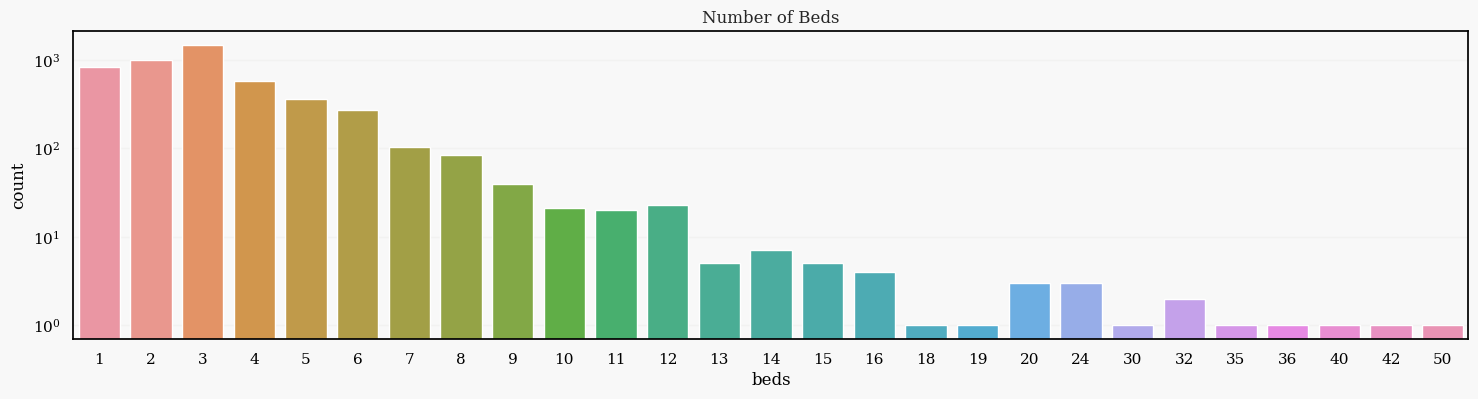

In [13]:
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.countplot(data=df, x='beds', log=True)
plt.title('Number of Beds')
plt.show()

### 3. Number of Baths:

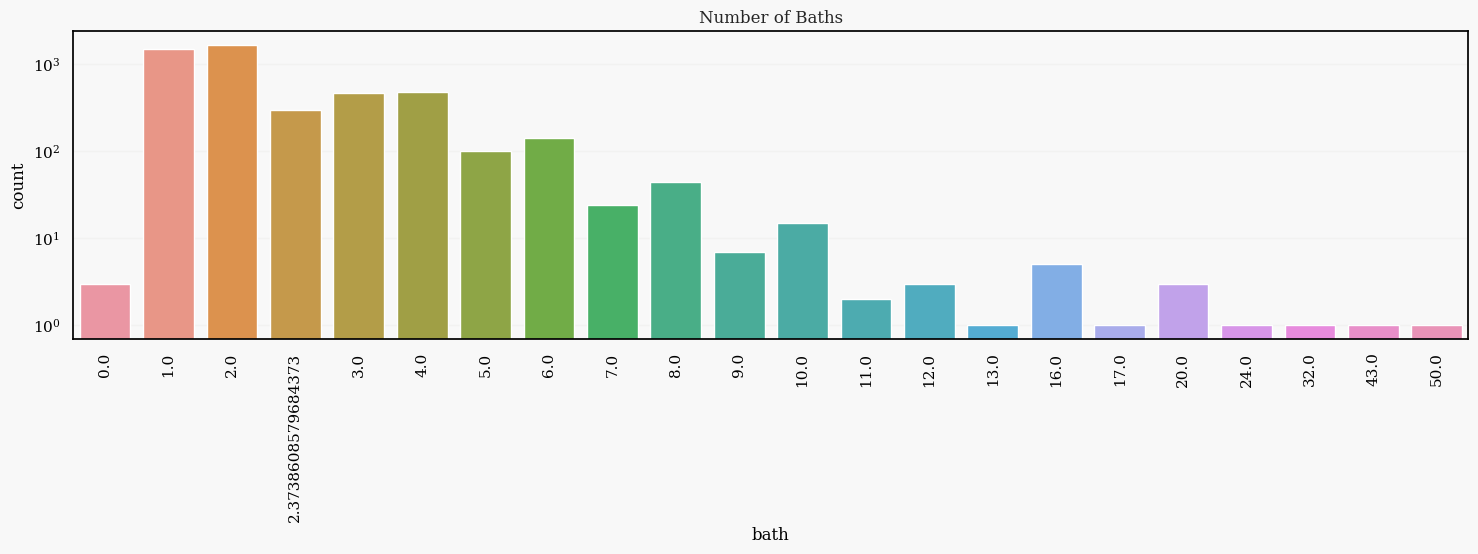

In [14]:
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.countplot(data=df, x='bath', log=True)
plt.xticks(rotation=90)
plt.title('Number of Baths')
plt.show()

In [15]:
df['bath'] = df['bath'].apply(np.ceil)

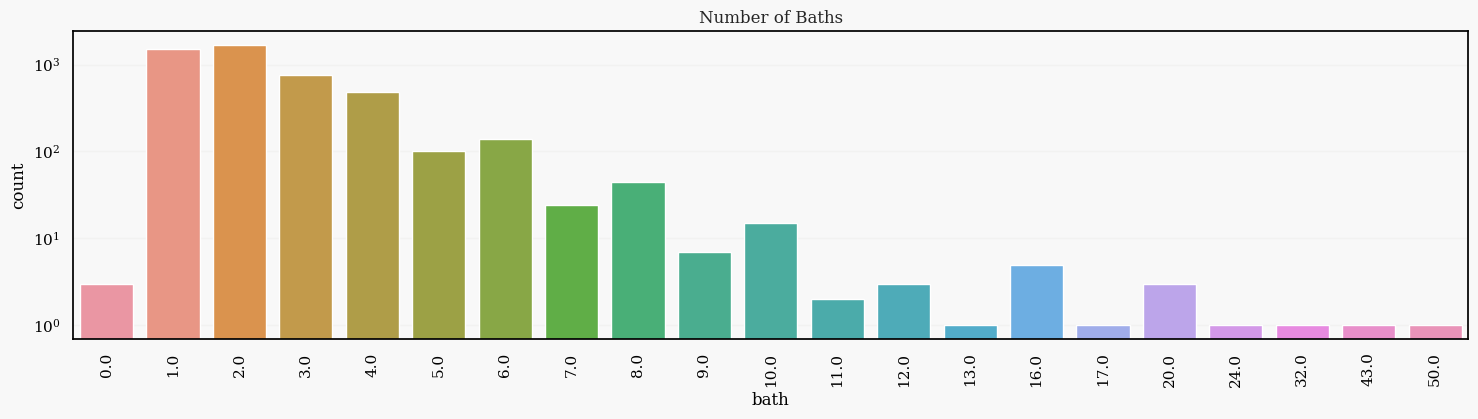

In [16]:
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.countplot(data=df, x='bath', log=True)
plt.xticks(rotation=90)
plt.title('Number of Baths')
plt.show()

### 4. Localities:

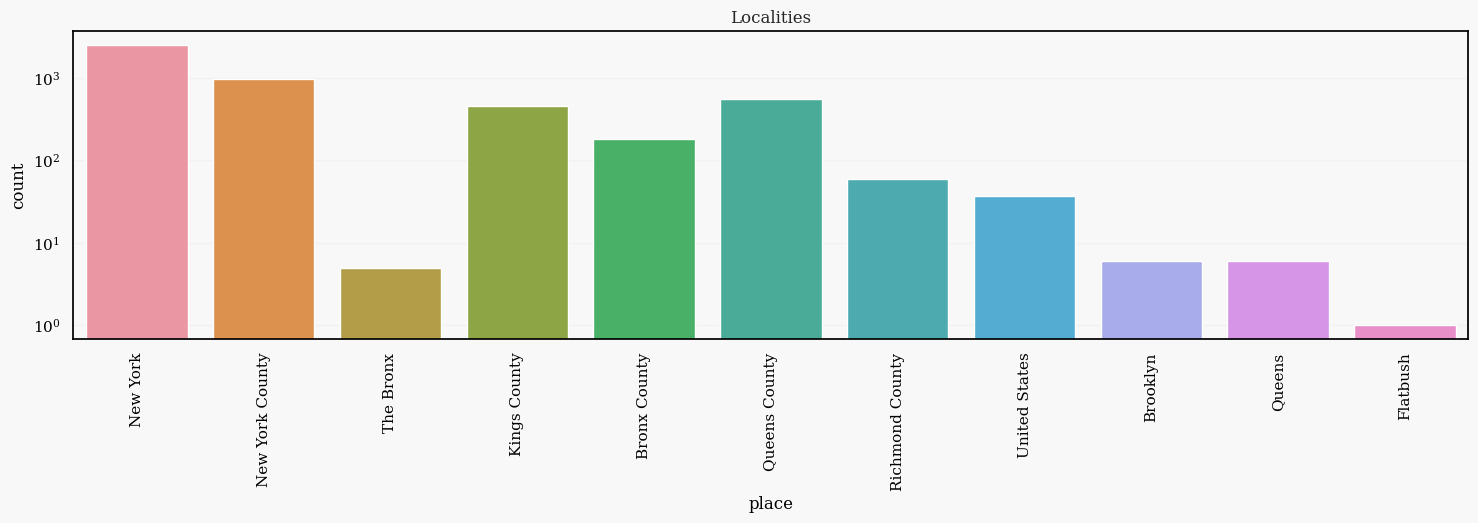

In [17]:
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.countplot(data=df, x='place', log=True)
plt.xticks(rotation=90)
plt.title('Localities')
plt.show()
print()

### 5. Sublocalities:

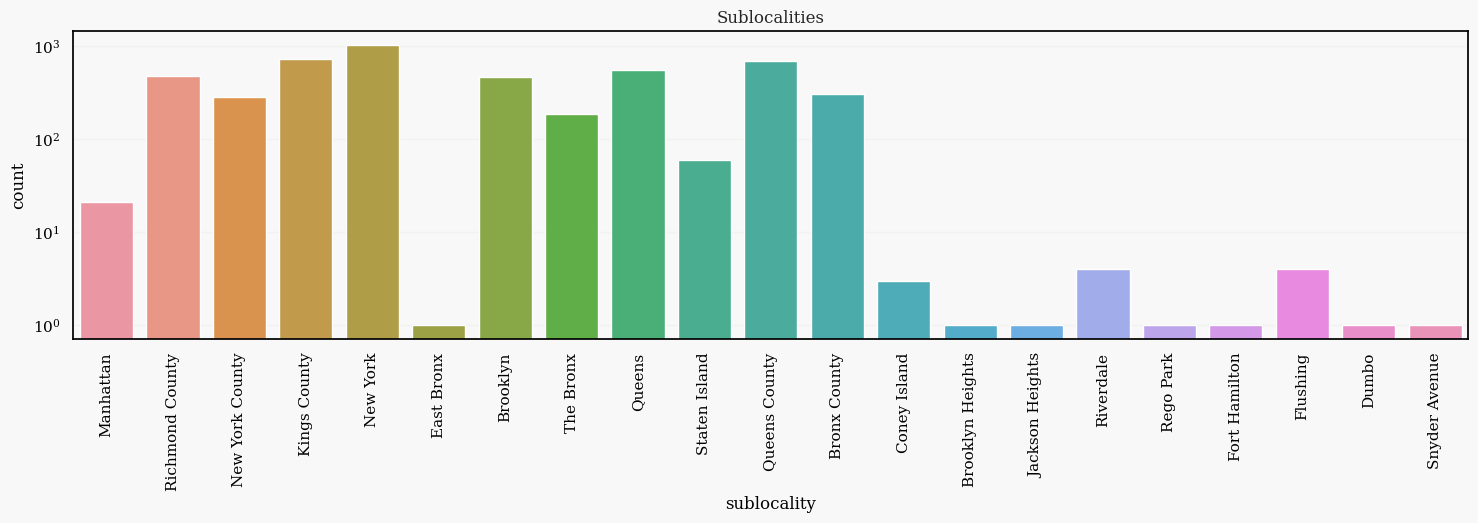

In [18]:
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.countplot(data=df, x='sublocality', log=True)
plt.xticks(rotation=90)
plt.title('Sublocalities')
plt.show()

### 6. Property area in SquareFeet: 
Distribution of various property's areas can be seen in following graph.

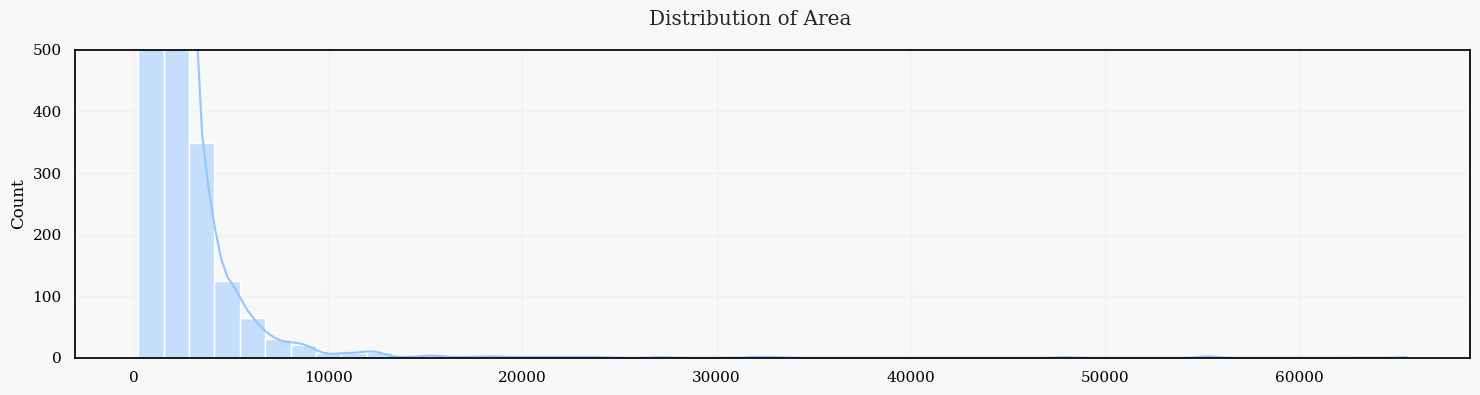

In [19]:
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.histplot(data=df, x='area', bins=50, kde=True)
plt.ylim(0,500)
plt.ticklabel_format(style = 'plain')
fig.set(xlabel='')
plt.suptitle('Distribution of Area')
plt.show()


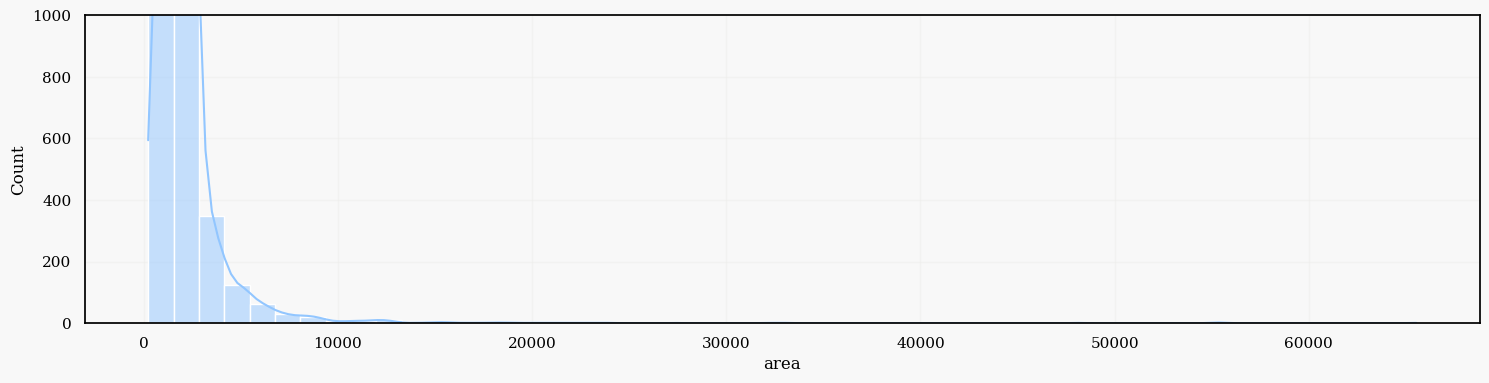

In [20]:
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.histplot(data=df, x='area', bins=50, kde=True)
plt.ylim(0,1000)
plt.ticklabel_format(style = 'plain')
plt.show()

### 7. Price:
Distribution of prices of houses can be seen in following graph.

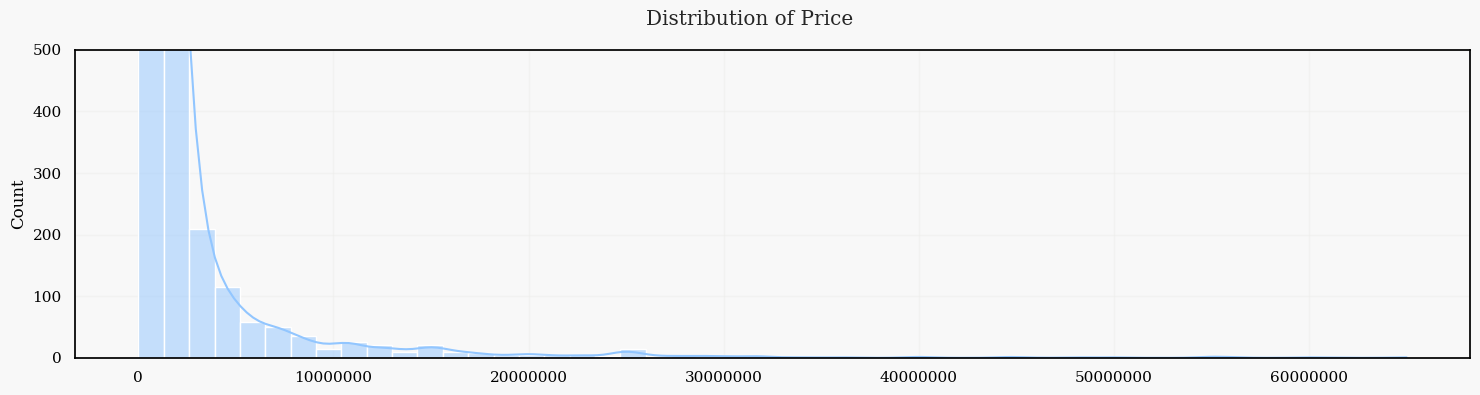

In [21]:
fig, ax = plt.subplots(figsize=(18, 4))
fig = sns.histplot(data=df, x='price', bins=50, kde=True)
plt.ylim(0,500)
plt.ticklabel_format(style = 'plain')
fig.set(xlabel='')
plt.suptitle('Distribution of Price')
plt.show()

In [22]:
le = LabelEncoder()
df.place = le.fit_transform(df.place)
df.sublocality = le.fit_transform(df.sublocality)
df.type = le.fit_transform(df.type)

## 2.4 Bivariate Regression Analysis

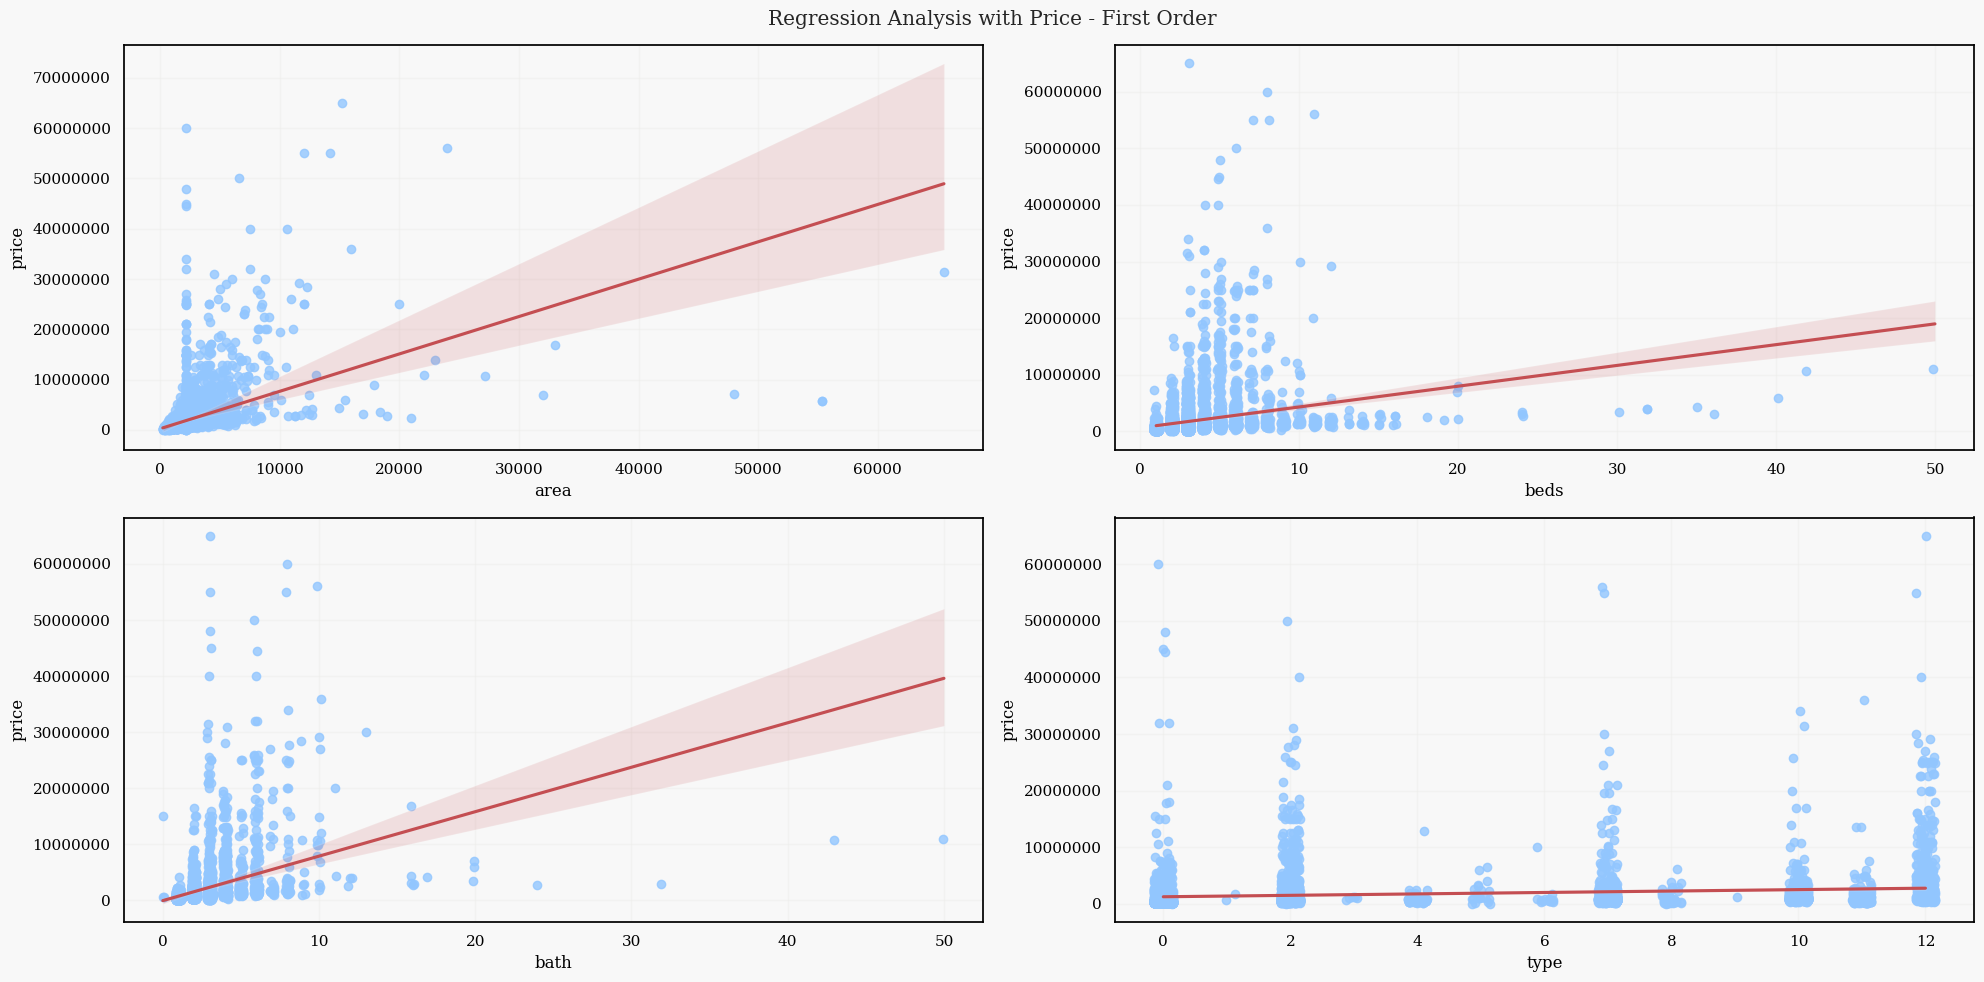

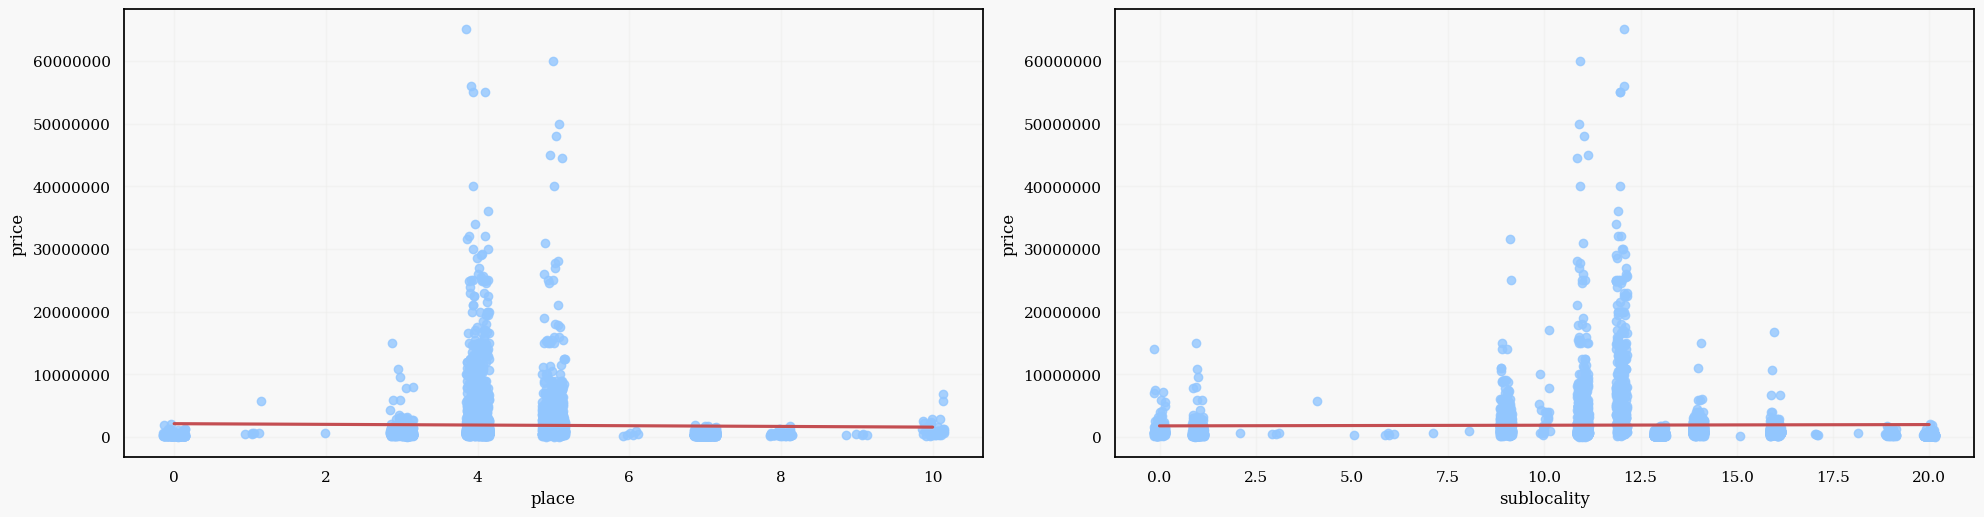

In [23]:
fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221); sns.regplot(data=df, x="area", y="price", x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig2 = fig.add_subplot(222); sns.regplot(data=df, x="beds", y="price", x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig3 = fig.add_subplot(223); sns.regplot(data=df, x="bath", y="price", x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig4 = fig.add_subplot(224); sns.regplot(data=df, x="type", y="price", x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

plt.suptitle('Regression Analysis with Price - First Order')
plt.tight_layout()
plt.show()

# -----------

fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221); sns.regplot(data=df, x="place", y="price", x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig2 = fig.add_subplot(222); sns.regplot(data=df, x="sublocality", y="price", x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

plt.tight_layout()
plt.show()

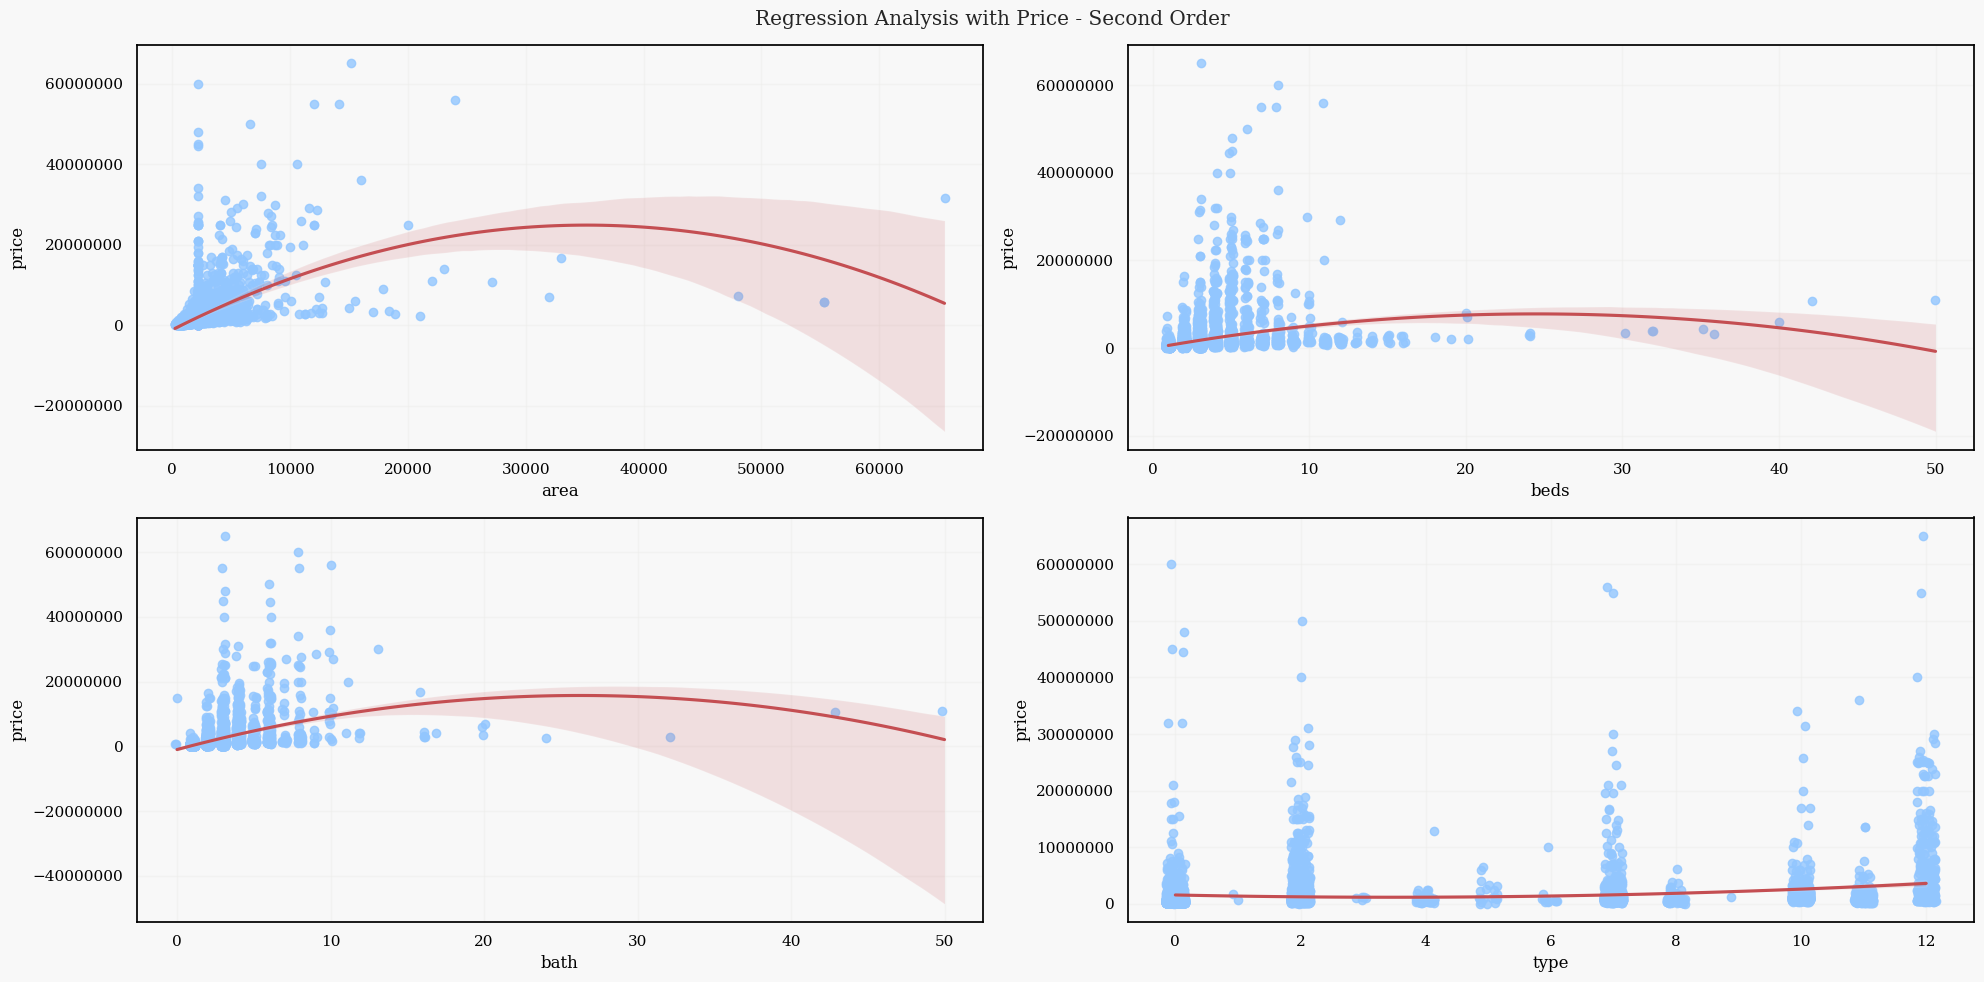

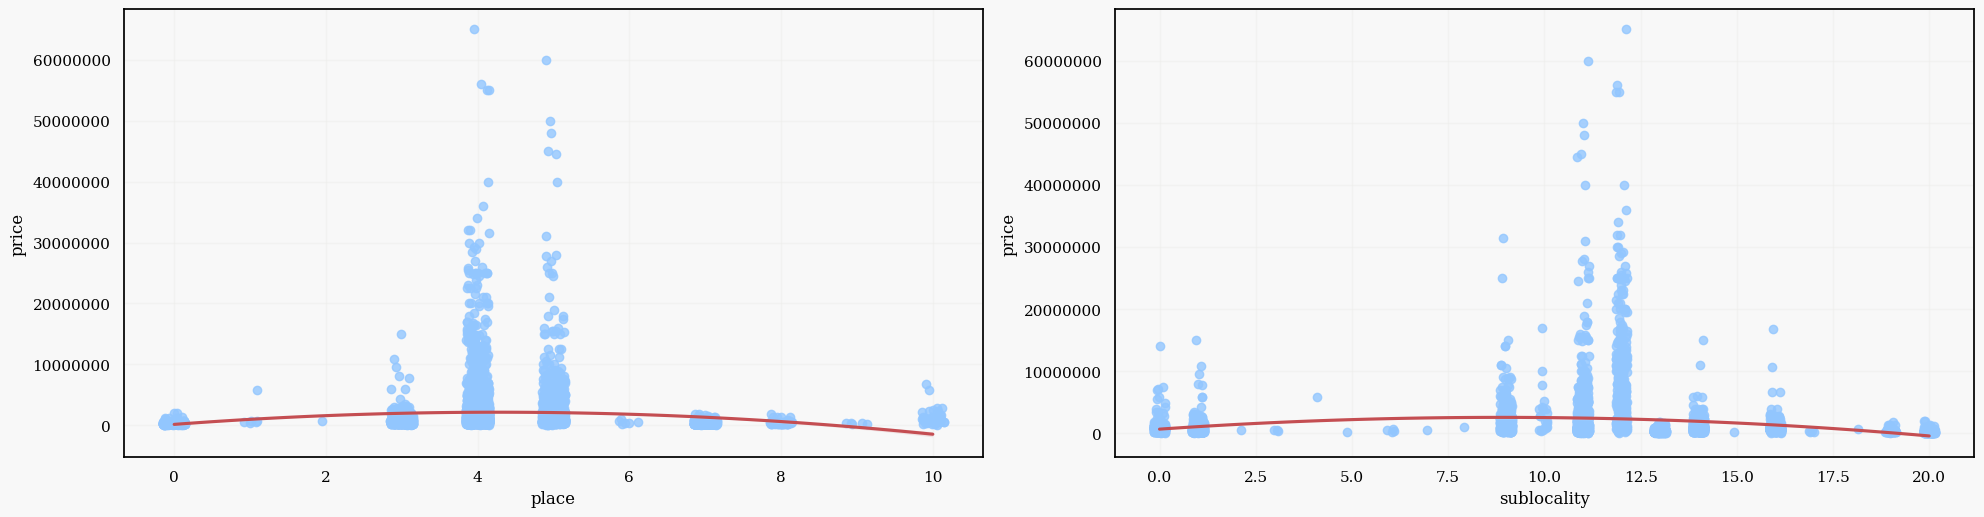

In [24]:
fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221); sns.regplot(data=df, x="area", y="price", order=2 ,x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig2 = fig.add_subplot(222); sns.regplot(data=df, x="beds", y="price", order=2, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig3 = fig.add_subplot(223); sns.regplot(data=df, x="bath", y="price", order=2, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig4 = fig.add_subplot(224); sns.regplot(data=df, x="type", y="price", order=2, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

plt.suptitle('Regression Analysis with Price - Second Order')
plt.tight_layout()
plt.show()

# -----------

fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221); sns.regplot(data=df, x="place", y="price", order=2, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig2 = fig.add_subplot(222); sns.regplot(data=df, x="sublocality", y="price", order=2, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

plt.tight_layout()
plt.show()

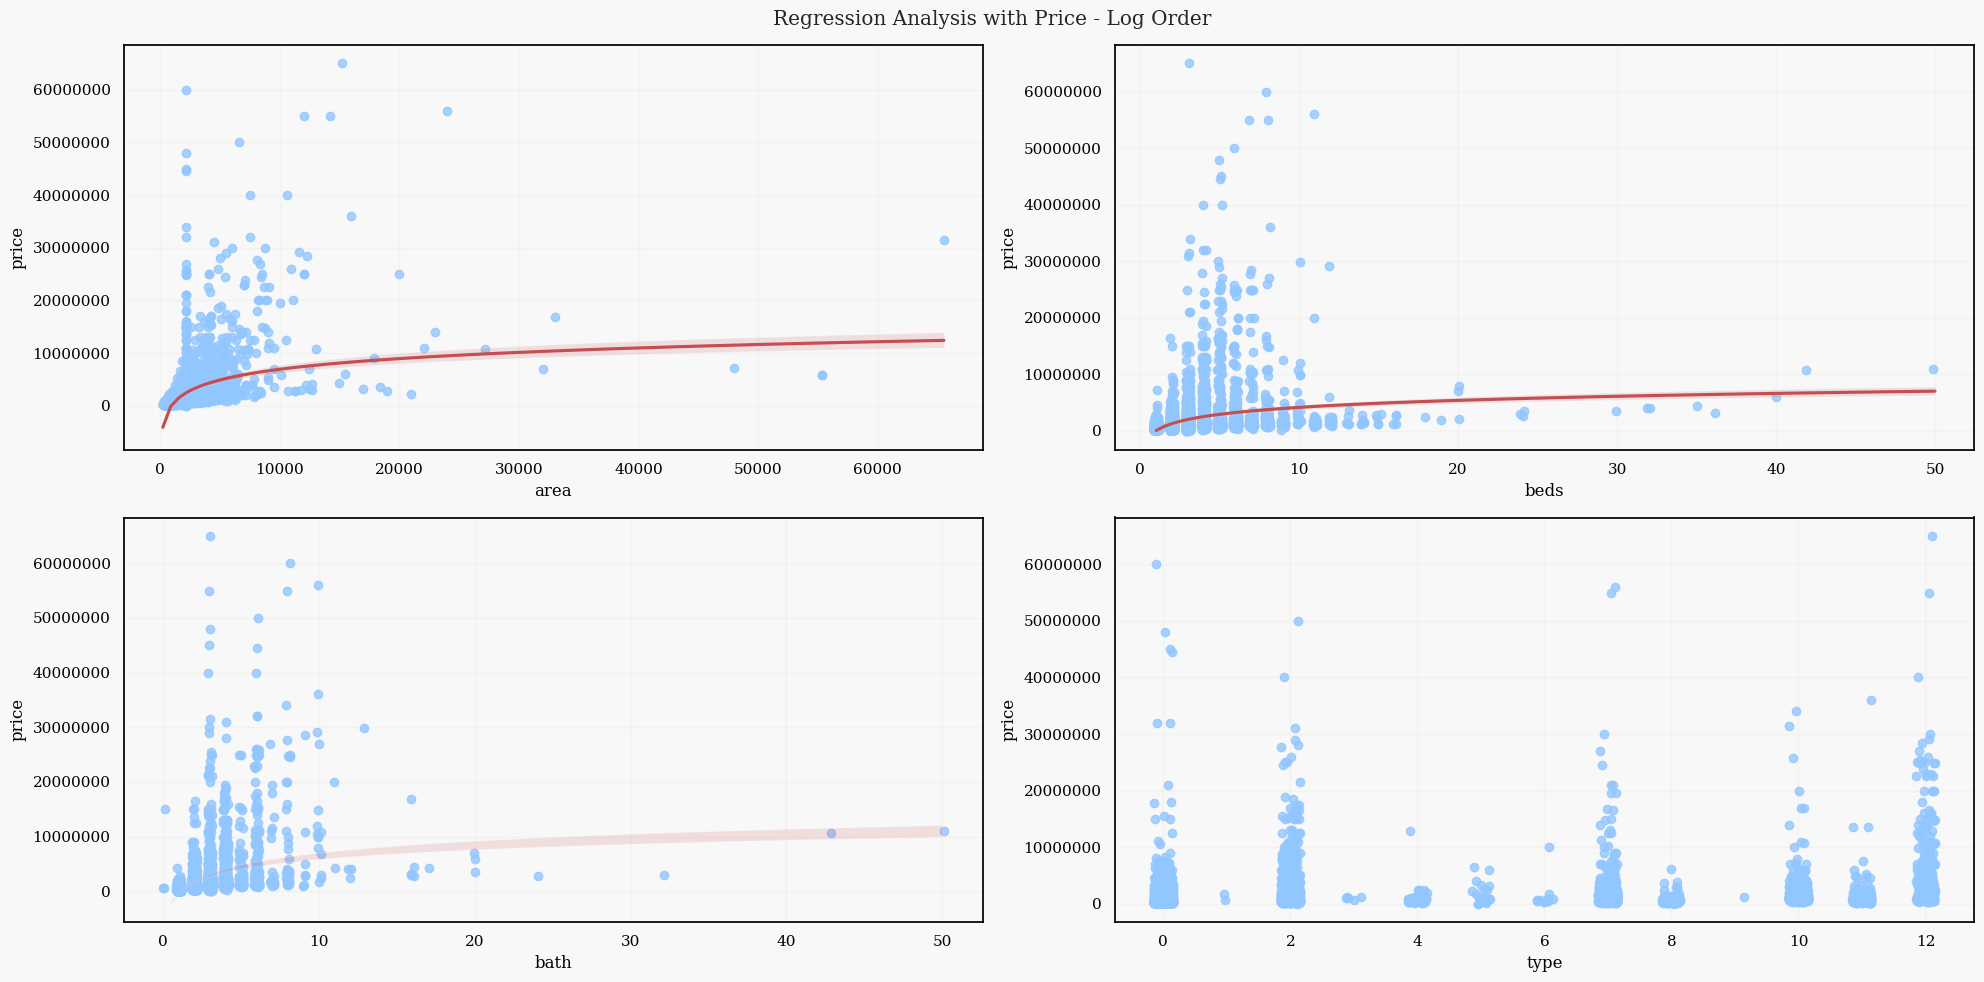

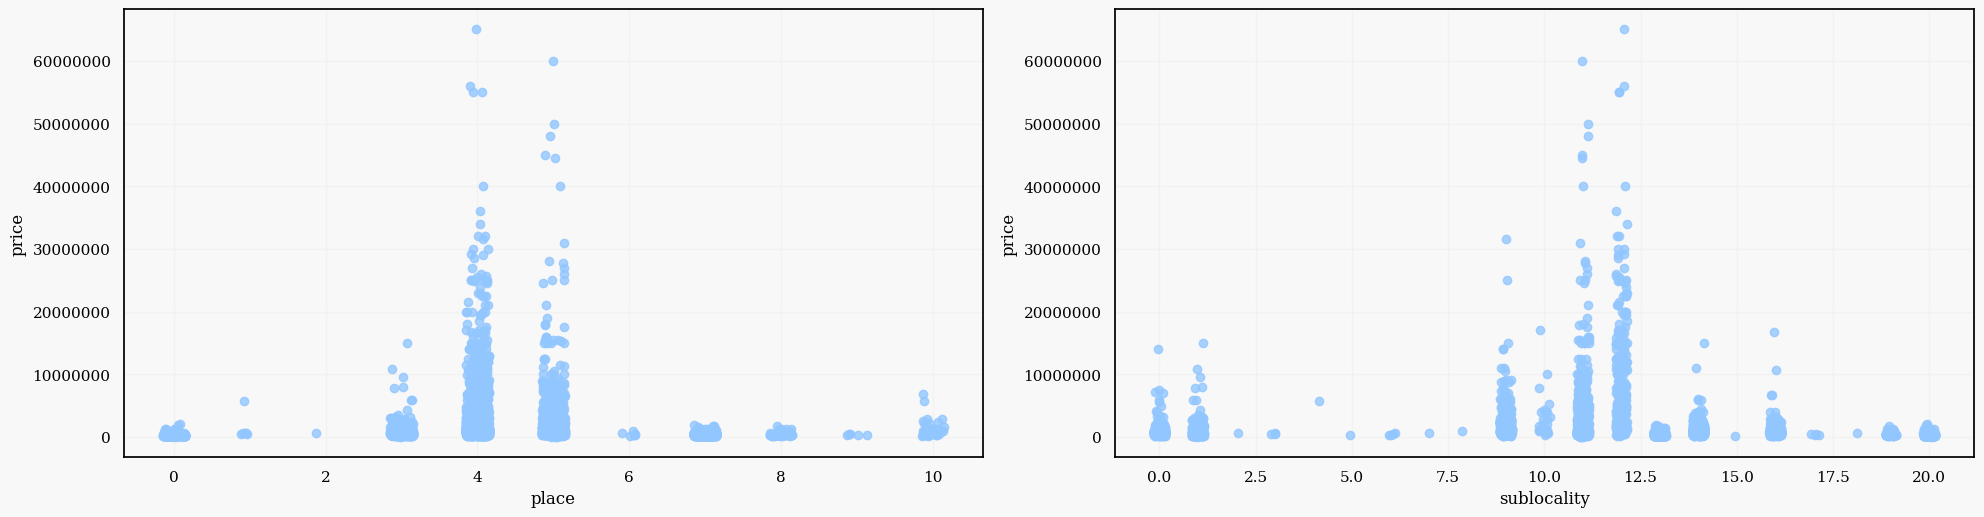

In [25]:
fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221); sns.regplot(data=df, x="area", y="price", logx=True ,x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig2 = fig.add_subplot(222); sns.regplot(data=df, x="beds", y="price", logx=True, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig3 = fig.add_subplot(223); sns.regplot(data=df, x="bath", y="price", logx=True, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig4 = fig.add_subplot(224); sns.regplot(data=df, x="type", y="price", logx=True, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

plt.suptitle('Regression Analysis with Price - Log Order')
plt.tight_layout()
plt.show()

# -----------

fig = plt.figure(figsize=(20, 10))

fig1 = fig.add_subplot(221); sns.regplot(data=df, x="place", y="price", logx=True, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

fig2 = fig.add_subplot(222); sns.regplot(data=df, x="sublocality", y="price", logx=True, x_jitter=.15, line_kws=dict(color="r"),)
plt.ticklabel_format(style = 'plain')

plt.tight_layout()
plt.show()

# 3. Modeling

## 3.1 Dropping unnecessary columns

In [26]:
df = df.drop(['type', 'place', 'sublocality'], axis=1)
df.head()

,price,beds,bath,area
0,315000,2,2.0,1400.0
2,260000,4,2.0,2015.0
3,69000,3,1.0,445.0
4,55000000,7,3.0,14175.0
5,690000,5,2.0,4004.0


In [27]:
X = df.drop(['price'], axis=1)
y = df['price']

In [28]:
X.head()

,beds,bath,area
0,2,2.0,1400.0
2,4,2.0,2015.0
3,3,1.0,445.0
4,7,3.0,14175.0
5,5,2.0,4004.0


In [29]:
y.head()

0      315000
2      260000
3       69000
4    55000000
5      690000
Name: price, dtype: int64

## 3.2 Encoding categorical variables

In [30]:
X_encoded = pd.get_dummies(X, columns=['bath',
                                       'beds'])

X_encoded.head()

,area,bath_0.0,bath_1.0,bath_2.0,bath_3.0,bath_4.0,bath_5.0,bath_6.0,bath_7.0,bath_8.0,...,beds_19,beds_20,beds_24,beds_30,beds_32,beds_35,beds_36,beds_40,beds_42,beds_50
0,1400.0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2015.0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,445.0,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,14175.0,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,4004.0,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3.3 Splitting data into train and test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, 
                                                    y, 
                                                    random_state=42,)

In [32]:
clf_xgb_v1 = xgb.XGBRegressor(objective="reg:squarederror",
                            # missing=None,
                            seed=42)

clf_xgb_v1.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=20,
            eval_metric='rmse',
            eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:4306923.34818
[1]	validation_0-rmse:4115886.13025
[2]	validation_0-rmse:4013062.54308
[3]	validation_0-rmse:3964086.62703
[4]	validation_0-rmse:3920905.47452
[5]	validation_0-rmse:3913600.15292
[6]	validation_0-rmse:3902785.16200
[7]	validation_0-rmse:3890883.26493
[8]	validation_0-rmse:3883540.52117
[9]	validation_0-rmse:3883087.73534
[10]	validation_0-rmse:3876298.75645
[11]	validation_0-rmse:3867683.12581
[12]	validation_0-rmse:3872075.08930
[13]	validation_0-rmse:3870679.71518
[14]	validation_0-rmse:3873105.69976
[15]	validation_0-rmse:3890323.67747
[16]	validation_0-rmse:3888767.62136
[17]	validation_0-rmse:3889365.95858
[18]	validation_0-rmse:3909460.94607
[19]	validation_0-rmse:3909001.99757
[20]	validation_0-rmse:3909105.33676
[21]	validation_0-rmse:3911076.34124
[22]	validation_0-rmse:3903557.85448
[23]	validation_0-rmse:3910474.92607
[24]	validation_0-rmse:3915822.50477
[25]	validation_0-rmse:3916319.66397
[26]	validation_0-rmse:3917702.49460
[27]	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# 4. Predictions

In [33]:
y_preds = clf_xgb_v1.predict(X_test)

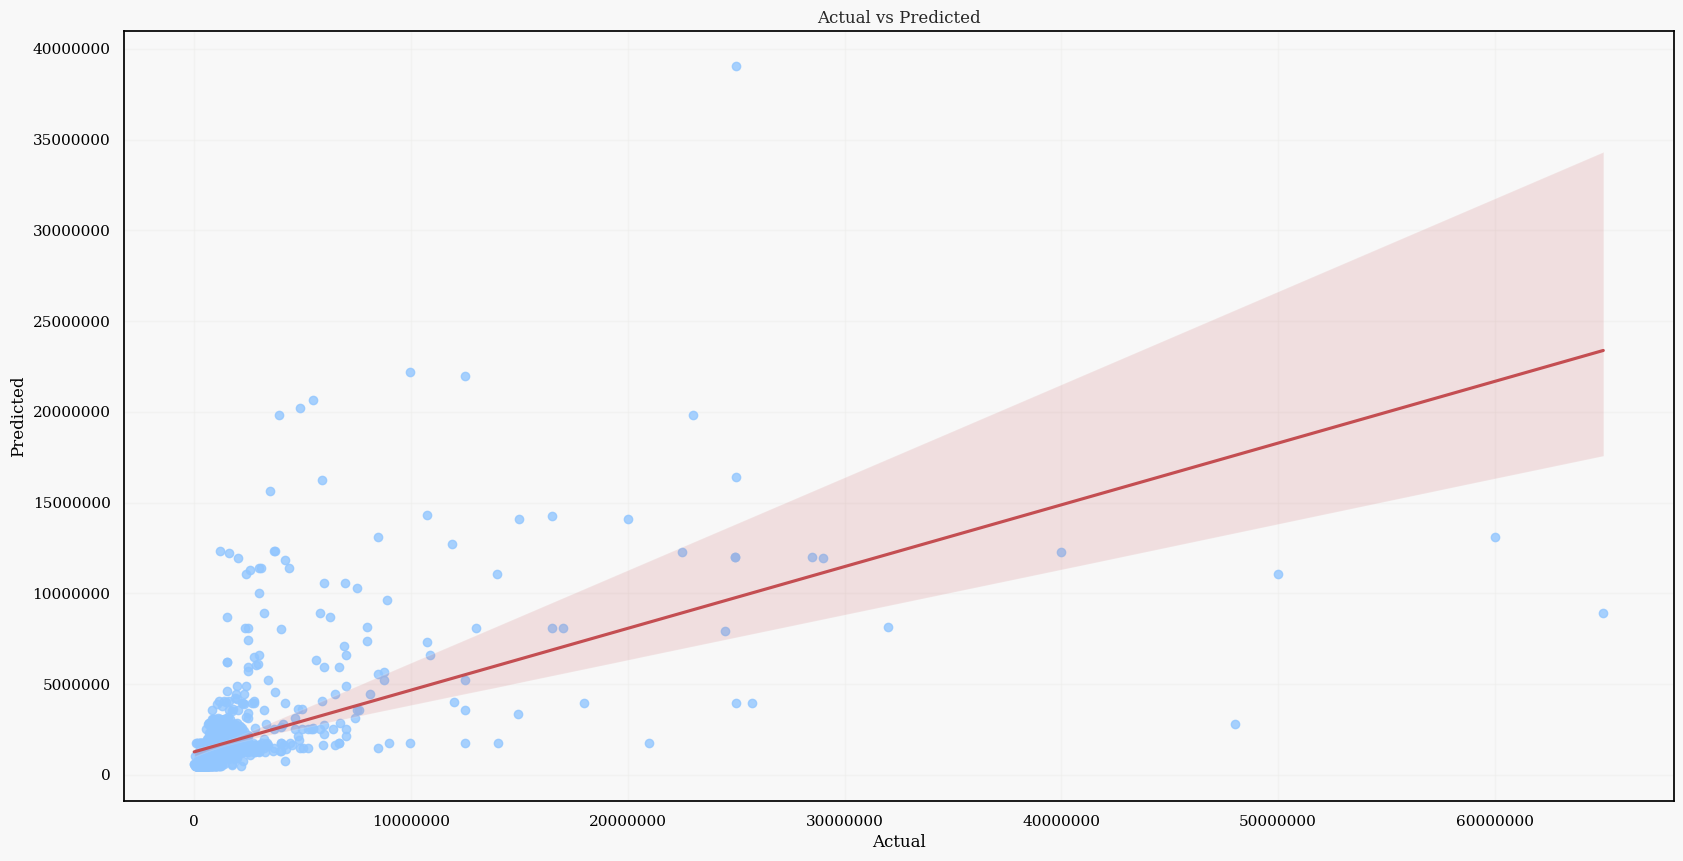

In [34]:
fig = plt.figure(figsize=(20, 10))
sns.regplot(data=df, x=y_test, y=y_preds, x_jitter=.15, line_kws=dict(color="r"),)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.ticklabel_format(style = 'plain')